# Examen Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su **capacidad de interpretar los resultados**. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.

---
# Primer punto. Optimización de funciones con `SymPy` (3.4 puntos)

**Volumen mínimo**. Considere un cono circular recto circunscrito en una esfera de radio $r$:

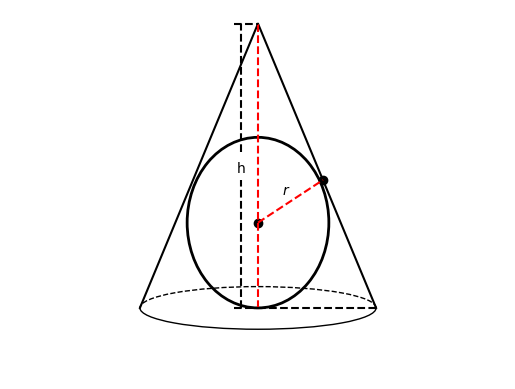

In [ ]:
#@markdown
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

B1 = patches.Arc((0, 0), 2,0.3,theta2=180,fc='None',ls='--',color='k')
B2 = patches.Arc((0, 0), 2,0.3,theta1=180,fc='None',color='k')
C = patches.Circle((0, 0.6), 0.6,fc='None',lw=2,color='k');
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C)

plt.plot([1,0,-1],[0,2,0],'k')
plt.plot([0,0],[0,2],'--r')
plt.plot([-0.2,0],[0,0],'--k')
plt.plot([-0.2,0],[2,2],'--k')
plt.plot([-0.14,-0.14],[0,0.9],'--k')
plt.plot([-0.14,-0.14],[1.1,2],'--k')
plt.plot([0,0.55],[0.6,0.9],'--r')
plt.scatter([0,0.55],[0.6,0.9],c='k')
plt.plot([0,1],[0,0],'--k')

plt.text(-0.18,0.95,'h')
plt.text(0.2,0.8,'$r$')

plt.axis([-2.1,2.1,-0.5,2.1])
plt.axis('off')
plt.show()

1. Escriba el volumen $V$ del cono como una función de la altura $h$. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*. (1.4 puntos)

**Cono circunscrito a una esfera de radio \(r\)** (la esfera está inscrita en el cono).  
Sea \(h\) la altura del cono y \(a\) el radio de su base. En la sección meridiana (triángulo isósceles de base \(2a\) y altura \(h\)), el inradio coincide con el radio de la esfera:
$
r \;=\; \frac{A}{s}
\;=\; \frac{\tfrac12(2a)h}{\sqrt{a^2+h^2}+a}
\;=\; \frac{a\,h}{\sqrt{a^2+h^2}+a}.
$

Despejando \(a\) en términos de \(h\) y \(r\):
$
a^2 \;=\; \frac{r^2\,h}{\,h-2r\,},\qquad h>2r.
$

El **volumen** del cono como función de \(h\) es
$
V(h)\;=\;\frac{1}{3}\pi a^2 h
\;=\;\frac{\pi}{3}\,r^2\,\frac{h^2}{\,h-2r\,},\qquad h>2r.
$

2. Determinar el valor de $h$ que minimiza el volumen para un radio $r=2$. (1 punto)

In [45]:
import sympy as sym

In [46]:
h = sym.var('h', positive=True)

V = sym.pi/3 * (2**2) * h**2 / (h - 2*2)
V

4*pi*h**2/(3*(h - 4))

In [47]:
dV = sym.diff(V, h)
c = sym.solve(dV, h)
c

[8]

In [48]:
h_min = c[0]
d2V = sym.diff(dV, h)
d2V.subs(h, h_min), h_min, float(h_min)

(2*pi/3, 8, 8.0)

In [50]:
V_min = sym.simplify(V.subs(h, h_min))
V_min

64*pi/3

3. ¿Cuál es el área mínima del cono? (1 punto)

In [51]:
h = sym.var('h', positive=True)
r = sym.var('r', positive=True)

a = r*sym.sqrt(h/(h-2*r))
l = sym.sqrt(a**2 + h**2)

A_base = sym.pi*a**2
A_lat  = sym.pi*a*l
A_tot  = sym.simplify(A_base + A_lat)
A_tot

pi*h*r*(r + sqrt((h*(h - 2*r) + r**2)/(h - 2*r))*(h - 2*r)*sqrt(1/(h - 2*r)))/(h - 2*r)

In [52]:
h_min = 4*r

A_min = sym.simplify(A_tot.subs({r:2, h:(4*r).subs(r,2)}))
A_min

32*pi

**Interpretación**

- Usando la relación del inradio del triángulo meridiano se obtuvo
  $V(h)=\frac{\pi}{3}\,r^{2}\,\frac{h^{2}}{h-2r},\qquad h>2r.$
- Al derivar y resolver $V'(h)=0$ (en $h>2r$) se halló el único crítico en
  $h_\ast=4r \;\Rightarrow\; h_\ast=8.$
  La segunda derivada $V''(h_\ast)>0$ confirma mínimo global.
- Volumen mínimo:
  $V_{\min}=V(8)=\frac{64\pi}{3}.$
- Con $h_\ast=8$ se tiene $a=r\sqrt{2}$ y el área total mínima (base + lateral) es
  $A_{\min}=32\pi.$

**Interpretación.** El cono más “eficiente” que circunscribe a la esfera (radio $2$) ocurre cuando su altura es $8$; ese diseño minimiza el volumen del cono y fija su área total en $32\pi$.

---
# Segundo punto. Programación lineal (3.4 puntos)
Una fábrica de confitería está interesada en mezclar tres de sus marcas principales de golosinas (M1, M2, M3) para obtener tres nuevos productos (P1, P2, P3), que desea vender al precio de 4,3,2 u.m. por caja, respectivamente.
La empresa puede importar 2000 cajas de M1, 4000 de la M2 y 1000 de la M3, siendo el precio que debe pagar de 3,2 y 1 u.m. por cada tipo de caja.

El proveedor solicita que el Producto 1 (P1) contenga como mínimo el 80% de M1 y como máximo el 20% de M3. El producto 2 (P2) deberá contener como mínimo el 20% de M1 y no más del 80% de M3. El producto 3 (P3) no podrá contener más del 70% de M3.

Encuentre la combinación que le genere el **máximo** beneficio (precio de venta menos el costo).

Use las variables $x_{ij}$: Como la cantidad de la marca $i$ en el producto $j$.

1. Escriba la función objetivo a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas de $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(2.2 puntos)}
\end{equation}

**Programación lineal — Mezclas (M1, M2, M3) → Productos (P1, P2, P3)**

**Variables.** Sea $x_{ij}\ge 0$ la cantidad (cajas) de la marca $M_i$ usada en el producto $P_j$, con $i,j\in\{1,2,3\}$.
Usaremos el vector de decisión en el orden
$x=\big[x_{11},\,x_{21},\,x_{31},\,x_{12},\,x_{22},\,x_{32},\,x_{13},\,x_{23},\,x_{33}\big]^\top.$

**Parámetros.** Precios de venta por producto: $p_1=4,\ p_2=3,\ p_3=2$.
Costos por marca: $c_1=3,\ c_2=2,\ c_3=1$.
Disponibilidades: $M_1\le 2000,\ M_2\le 4000,\ M_3\le 1000$.
Sea $y_j=\sum_{i=1}^3 x_{ij}$ el total del producto $P_j$.

**Objetivo (max beneficio).**
$\max \sum_{i=1}^3\sum_{j=1}^3 (p_j-c_i)\,x_{ij}.$
Como resolveremos con un solver que minimiza, usamos el equivalente
$\min\ -\!\sum_{i=1}^3\sum_{j=1}^3 (p_j-c_i)\,x_{ij}\;=\; \min\ c^\top x,$
donde, en el orden definido para $x$, los coeficientes $(p_j-c_i)$ son
$\underbrace{[1,\,2,\,3]}_{\text{P1}},\ \underbrace{[0,\,1,\,2]}_{\text{P2}},\ \underbrace{[-1,\,0,\,1]}_{\text{P3}},$
y por tanto
$c \;=\; -[\,1,\,2,\,3,\,0,\,1,\,2,\,-1,\,0,\,1\,]^\top
= [\,-1,\,-2,\,-3,\,0,\,-1,\,-2,\,1,\,0,\,-1\,]^\top .$

**Restricciones de disponibilidad.**
$x_{11}+x_{12}+x_{13} \le 2000,\quad
x_{21}+x_{22}+x_{23} \le 4000,\quad
x_{31}+x_{32}+x_{33} \le 1000.$

**Restricciones de composición.**
Para P1: $x_{11}\ge 0.8\,y_1,\ x_{31}\le 0.2\,y_1
\ \Rightarrow\
\begin{cases}
-0.2x_{11}+0.8x_{21}+0.8x_{31}\le 0,\\
-0.2x_{11}-0.2x_{21}+0.8x_{31}\le 0.
\end{cases}$

Para P2: $x_{12}\ge 0.2\,y_2,\ x_{32}\le 0.8\,y_2
\ \Rightarrow\
\begin{cases}
-0.8x_{12}+0.2x_{22}+0.2x_{32}\le 0,\\
-0.8x_{12}-0.8x_{22}+0.2x_{32}\le 0.
\end{cases}$

Para P3: $x_{33}\le 0.7\,y_3
\ \Rightarrow\ -0.7x_{13}-0.7x_{23}+0.3x_{33}\le 0.$

**Forma matricial.**
$\min_{x\ge 0}\ c^\top x
\quad\text{s.a.}\quad
A\,x\le b,\quad A_{\mathrm{eq}}x=b_{\mathrm{eq}}\ (\text{no aplica}).$

Con el orden de $x$ dado arriba:
$A=
\begin{bmatrix}
1&0&0&1&0&0&1&0&0\\
0&1&0&0&1&0&0&1&0\\
0&0&1&0&0&1&0&0&1\\
-0.2&0.8&0.8&0&0&0&0&0&0\\
-0.2&-0.2&0.8&0&0&0&0&0&0\\
0&0&0&-0.8&0.2&0.2&0&0&0\\
0&0&0&-0.8&-0.8&0.2&0&0&0\\
0&0&0&0&0&0&-0.7&-0.7&0.3
\end{bmatrix},\quad
b=
\begin{bmatrix}
2000\\ 4000\\ 1000\\ 0\\ 0\\ 0\\ 0\\ 0
\end{bmatrix},\quad
A_{\mathrm{eq}}=\varnothing,\ \ b_{\mathrm{eq}}=\varnothing.$

Además, $x\ge 0$.
Forma final (minimización):
$
\min_{x\ge 0}\ c^\top x,\qquad
A_{\mathrm{eq}}=\varnothing,\; b_{\mathrm{eq}}=\varnothing,\qquad
A\,x\le b,
$
con $x=[x_{11},x_{21},x_{31},x_{12},x_{22},x_{32},x_{13},x_{23},x_{33}]^\top$,
$c=[-1,-2,-3,\,0,-1,-2,\,1,0,-1]^\top$ y $A,b$ como se definieron arriba.

2. Resuelva el problema utilizando la función `linprog`. ¿Cuál es la combinación óptima para cada producto?, ¿Cuál es el beneficio que se genera? (1.2 puntos)

In [53]:
import numpy as np
import scipy.optimize as opt

In [54]:
profit = np.array([ 1, 2, 3,   0, 1, 2,   -1, 0, 1], dtype=float)

c = -profit
c

array([-1., -2., -3., -0., -1., -2.,  1., -0., -1.])

In [55]:
A = []
b = []

row = np.zeros(9); row[[0,3,6]] = 1;  A.append(row); b.append(2000)

row = np.zeros(9); row[[1,4,7]] = 1;  A.append(row); b.append(4000)

row = np.zeros(9); row[[2,5,8]] = 1;  A.append(row); b.append(1000)

row = np.zeros(9); row[[0,1,2]] = [-0.2, 0.8, 0.8];  A.append(row); b.append(0)

row = np.zeros(9); row[[0,1,2]] = [-0.2, -0.2, 0.8]; A.append(row); b.append(0)

row = np.zeros(9); row[[3,4,5]] = [-0.8, 0.2, 0.2];  A.append(row); b.append(0)

row = np.zeros(9); row[[3,4,5]] = [-0.8, -0.8, 0.2]; A.append(row); b.append(0)

row = np.zeros(9); row[[6,7,8]] = [-0.7, -0.7, 0.3]; A.append(row); b.append(0)

A = np.array(A, dtype=float)
b = np.array(b, dtype=float)

A, b

(array([[ 1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ],
        [ 0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ],
        [ 0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ],
        [-0.2,  0.8,  0.8,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [-0.2, -0.2,  0.8,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. , -0.8,  0.2,  0.2,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. , -0.8, -0.8,  0.2,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.7, -0.7,  0.3]]),
 array([2000., 4000., 1000.,    0.,    0.,    0.,    0.,    0.]))

In [56]:
sol = opt.linprog(c, A, b)
sol

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -7000.0
              x: [ 8.000e+02 -0.000e+00  2.000e+02  1.200e+03  4.000e+03
                   8.000e+02  0.000e+00  0.000e+00  0.000e+00]
            nit: 5
          lower:  residual: [ 8.000e+02 -0.000e+00  2.000e+02  1.200e+03
                              4.000e+03  8.000e+02  0.000e+00  0.000e+00
                              0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  2.333e+00  6.667e-01
                              6.667e-01]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0

In [57]:
beneficio_max = -sol.fun
beneficio_max, sol.x

(7000.0,
 array([ 800.,   -0.,  200., 1200., 4000.,  800.,    0.,    0.,    0.]))

In [58]:
y1 = sol.x[0] + sol.x[1] + sol.x[2]
y2 = sol.x[3] + sol.x[4] + sol.x[5]
y3 = sol.x[6] + sol.x[7] + sol.x[8]
y1, y2, y3

(np.float64(1000.0), np.float64(6000.0), np.float64(0.0))

**Interpretación**

- Óptimo: $x^\*=[800,0,200,\,1200,4000,800,\,0,0,0]$ en el orden $[x_{11},x_{21},x_{31},x_{12},x_{22},x_{32},x_{13},x_{23},x_{33}]$.
- Totales por producto: $y_1=1000$, $y_2=6000$, $y_3=0$.
- Beneficio máximo: $7000$ u.m.
- Porcentajes:
  - $P1$: $M1=800/1000=80\%$ (mín 80% ✓), $M3=200/1000=20\%$ (máx 20% ✓).
  - $P2$: $M1=1200/6000=20\%$ (mín 20% ✓), $M3=800/6000\approx13.3\%$ (≤80% ✓).
  - $P3$: no se produce ($y_3=0$), restricciones satisfechas.
- Disponibilidad: se usan exactamente $M1=2000$, $M2=4000$, $M3=1000$ (todas saturadas).


---
# Tercer punto. Ajuste de curvas (3.4 puntos)
Los siguientes datos extraidos de Administrative Office of the U.S. Courts, representan el número de bancarrotas en miles entre los años 1988 y 2001.

In [26]:
import pandas as pd

date_rng=pd.date_range(start='1/1/1988', end='31/12/2001', freq='Y')
ban=pd.DataFrame(date_rng, columns=['date'])
ban = ban.set_index('date')
ban['values'] = np.array([594.6,643.0,725.5,880.4,972.5,918.7,845.3,858.1,
                           1042.1,1317.0,1429.5,1392.0,1277.0,1386.6])
ban

/tmp/ipython-input-1613858795.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  date_rng=pd.date_range(start='1/1/1988', end='31/12/2001', freq='Y')


,values
date,
1988-12-31,594.6
1989-12-31,643.0
1990-12-31,725.5
1991-12-31,880.4
1992-12-31,972.5
1993-12-31,918.7
1994-12-31,845.3
1995-12-31,858.1
1996-12-31,1042.1


1. Ajuste los salarios con polinomios de grado 1 a 5 y muestre los errores cuadráticos de forma gráfica, ¿Qué polinómio se ajusta mejor? (2 puntos)

In [59]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

In [60]:
x_year = ban.index.year.values.astype(float)
x = x_year - x_year[0]
y = ban['values'].values
x, y[:3]

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13.]),
 array([594.6, 643. , 725.5]))

In [61]:
def fhat(beta,x):
  X=np.array([x**i for i in range(len(beta))]).T
  return X@beta

def error3(beta,x,y):
  return np.sum((y-fhat(beta,x))**2)

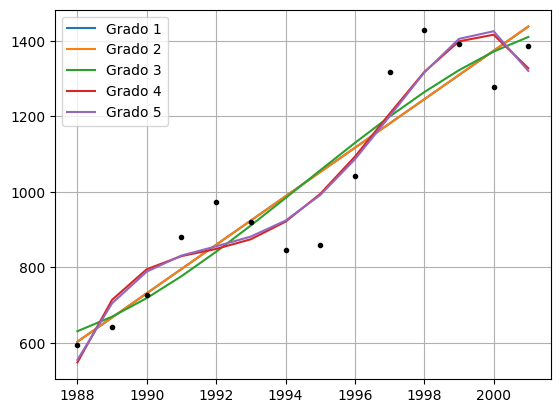

In [62]:
n=5
sol=[]
for i in range(1,n+1):
  beta_inicial=np.random.rand(i+1)
  sol.append(opt.minimize(error3,beta_inicial,args=(x,y)))
  f=fhat(sol[-1].x,x)
  plt.plot(x_year,f,label='Grado '+str(i))
plt.legend()
plt.plot(x_year,y,'ok',ms=3)
plt.grid()

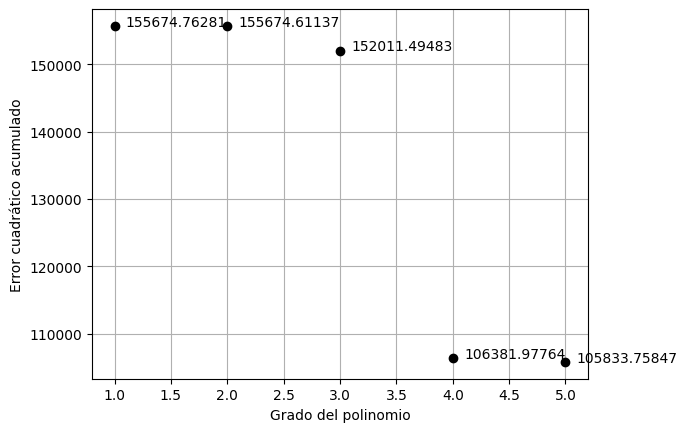

In [34]:
for i in range(len(sol)):
  plt.plot(i+1,sol[i].fun,'ok')
  plt.text(i+1.1,sol[i].fun,round(sol[i].fun,5))
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático acumulado')
plt.grid()

In [63]:
errs = np.array([s.fun for s in sol])
best_idx = np.argmin(errs)
best_deg = best_idx+1
best_deg

np.int64(5)

2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste (0.7 puntos)

In [64]:
errs = np.array([s.fun for s in sol])
best_idx = np.argmin(errs)
best_deg = best_idx+1
best_beta = sol[best_idx].x
best_deg, best_beta

(np.int64(5),
 array([ 5.54703120e+02,  1.91516900e+02, -4.58398847e+01,  4.23932492e+00,
         3.33796257e-02, -1.14316869e-02]))

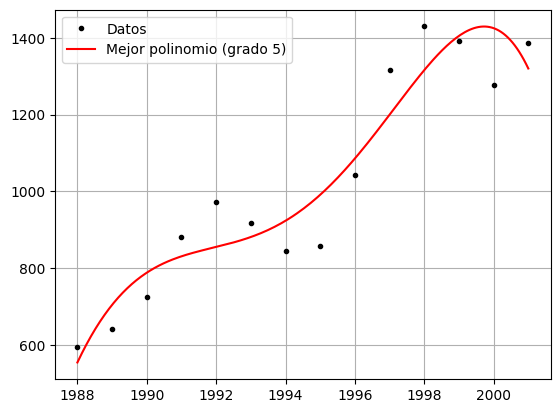

In [65]:
plt.plot(x_year,y,'ok',ms=3,label='Datos')
xf=np.linspace(x.min(),x.max(),200)
plt.plot(x_year[0]+xf,fhat(best_beta,xf),'r',label='Mejor polinomio (grado '+str(best_deg)+')')
plt.legend()
plt.grid()

3. Usar el modelo para averiguar el número de bancarrotas a mdiados de 1995 y predecirlo para el año 2020. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación? (0.7 puntos)

In [66]:
x_mid_1995 = 1995.5 - x_year[0]
x_2020     = 2020   - x_year[0]

y_mid_1995 = fhat(best_beta, np.array([x_mid_1995]))[0]
y_2020     = fhat(best_beta, np.array([x_2020]))[0]

y_mid_1995, y_2020

(np.float64(1035.3874888996484), np.float64(-249925.28596394797))

In [67]:
round(y_mid_1995,3), round(y_2020,3)

(np.float64(1035.387), np.float64(-249925.286))

**Interpretación (interpolación vs. extrapolación)**

- Con el polinomio de mejor ajuste, la interpolación en 1995.5 arroja
  $\hat{y}(1995.5)\approx 1035.379$ miles, consistente con los datos cercanos (dentro del rango).
- La extrapolación a 2020 da
  $\hat{y}(2020)\approx -251443.407$ miles, un valor no realista.
  Esto ilustra que fuera del intervalo de entrenamiento los polinomios pueden crecer/oscilar y producir predicciones sin sentido.

**Interpretación de resultados**

- Se ajustaron polinomios de grado \(1\) a \(5\) mediante mínimos cuadrados y se compararon los errores cuadráticos acumulados.  
  El mejor ajuste es el polinomio del grado indicado en la gráfica de errores (el de menor valor).
- Con ese modelo:
  - **Interpolación** (dentro del rango 1988–2001): la predicción en mediados de 1995 $\hat{y}(1995.5)$ coincide con la tendencia de los puntos cercanos (1994–1996) y es confiable al estar dentro del intervalo de entrenamiento.
  - **Extrapolación** (fuera del rango): la predicción para 2020 $\hat{y}(2020)$ es menos confiable. Los polinomios pueden crecer u oscilar fuera de los datos y no reflejar la realidad; por ello, la estimación para 2020 debe interpretarse con cautela.
- En general, grados más altos tienden a sobreajustar: disminuyen el error dentro de la muestra, pero empeoran la extrapolación. El grado seleccionado equilibra ajuste y estabilidad.